In [108]:

import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

from pylab import rcParams
import scipy as sp
import seaborn as sns
import xgboost as xgb

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import neighbors

from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.special import boxcox1p
import scipy.stats.stats as stats


from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.compose import ColumnTransformer

from sklearn.externals import joblib

from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML




### Here are the main steps you will go through:
    Look at the big picture. 
    Get the data. 
    Discover and visualize the data to gain insights. 
    Prepare the data for Machine Learning algorithms. 
    Select a model and train it. 
    Fine-tune your model. 
    Present your solution. 
    Launch, monitor, and maintain your system.

### Project overview
    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
    
### Select a Performance Measure

### Check the Assumptions

In [28]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [29]:
#read in train data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
a=train.shape
b=test.shape
print("train's shape",a)
print("test's shape",b)

train's shape (1460, 81)
test's shape (1459, 80)


In [31]:
#read in test data
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Data inspection and plotting

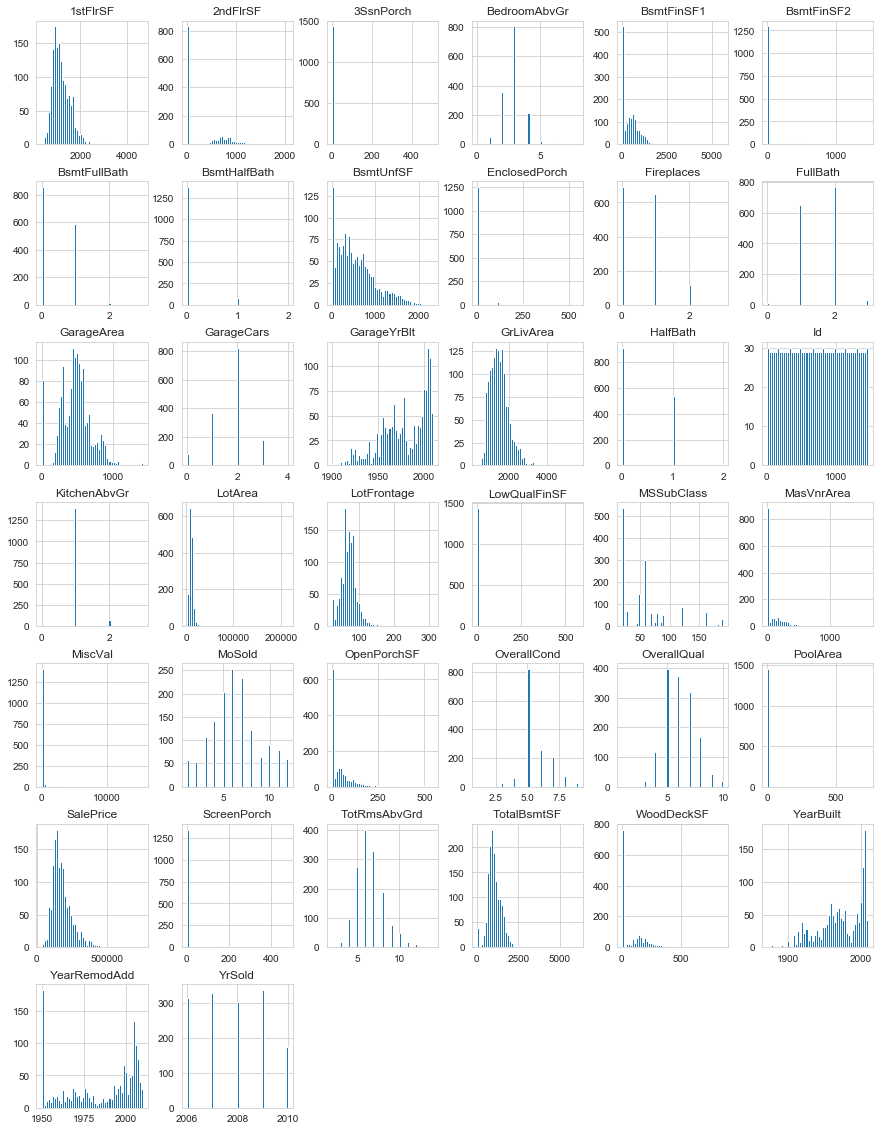

In [34]:
train.hist(bins=50,figsize=(15,20))

plt.show()

In [35]:
### Create a validation set
    #you can use from sklearn.model_selection "train_test_split" for random sampling if you have a large dataset
    # but you run the risk of introducing a significant sampling bias.
    # We will assume that we are told that median income is a very important attribute, thus we will make new feature
    # called income_category to help split and shuffle the data to make sure we have adequate sampling for the different
    #income categories
    
#split the training and testing data based OverallCond
#from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["OverallQual"]):
    strat_train_set = train.loc[train_index]
    strat_validation_set = train.loc[test_index]

In [36]:
#Lets look at the proportion of data allocated to each income category for the training set
strat_train_set.OverallQual.value_counts()/len(strat_train_set)*100

5     27.226027
6     25.599315
7     21.832192
8     11.558219
4      7.962329
9      2.910959
3      1.369863
10     1.198630
2      0.171233
1      0.171233
Name: OverallQual, dtype: float64

In [37]:
#Lets look at the proportion of data allocated to each income category for the validation set
strat_validation_set.OverallQual.value_counts()/len(strat_validation_set)*100

5     27.054795
6     25.684932
7     21.917808
8     11.301370
4      7.876712
9      3.082192
10     1.369863
3      1.369863
2      0.342466
Name: OverallQual, dtype: float64

In [38]:
#Lets look at the proportion of data allocated to each income category for the original training set
train.OverallQual.value_counts()/len(train)*100

5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64

In [39]:
#lets separate out the categorical features
cat_attrib=strat_train_set.select_dtypes(include=['object'])
cat_attrib.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
825,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
948,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,NaN,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
188,RL,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Alloca
1059,RL,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,Fa,Y,NaN,NaN,NaN,WD,Normal
667,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [40]:
cat_attrib.shape

(1168, 43)

In [41]:
#Lets create a count plot of the categorical feature variables

def plot_new_feature_distribution(df1,features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, axis = plt.subplots(8,6,figsize=(30,30))
    axis = axis.flatten()

    
    for feature in features:
        i += 1
        plt.subplot(8,6,i)
        sns.countplot(y=df1[feature],data=df1)
        #plt.xlabel(feature, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

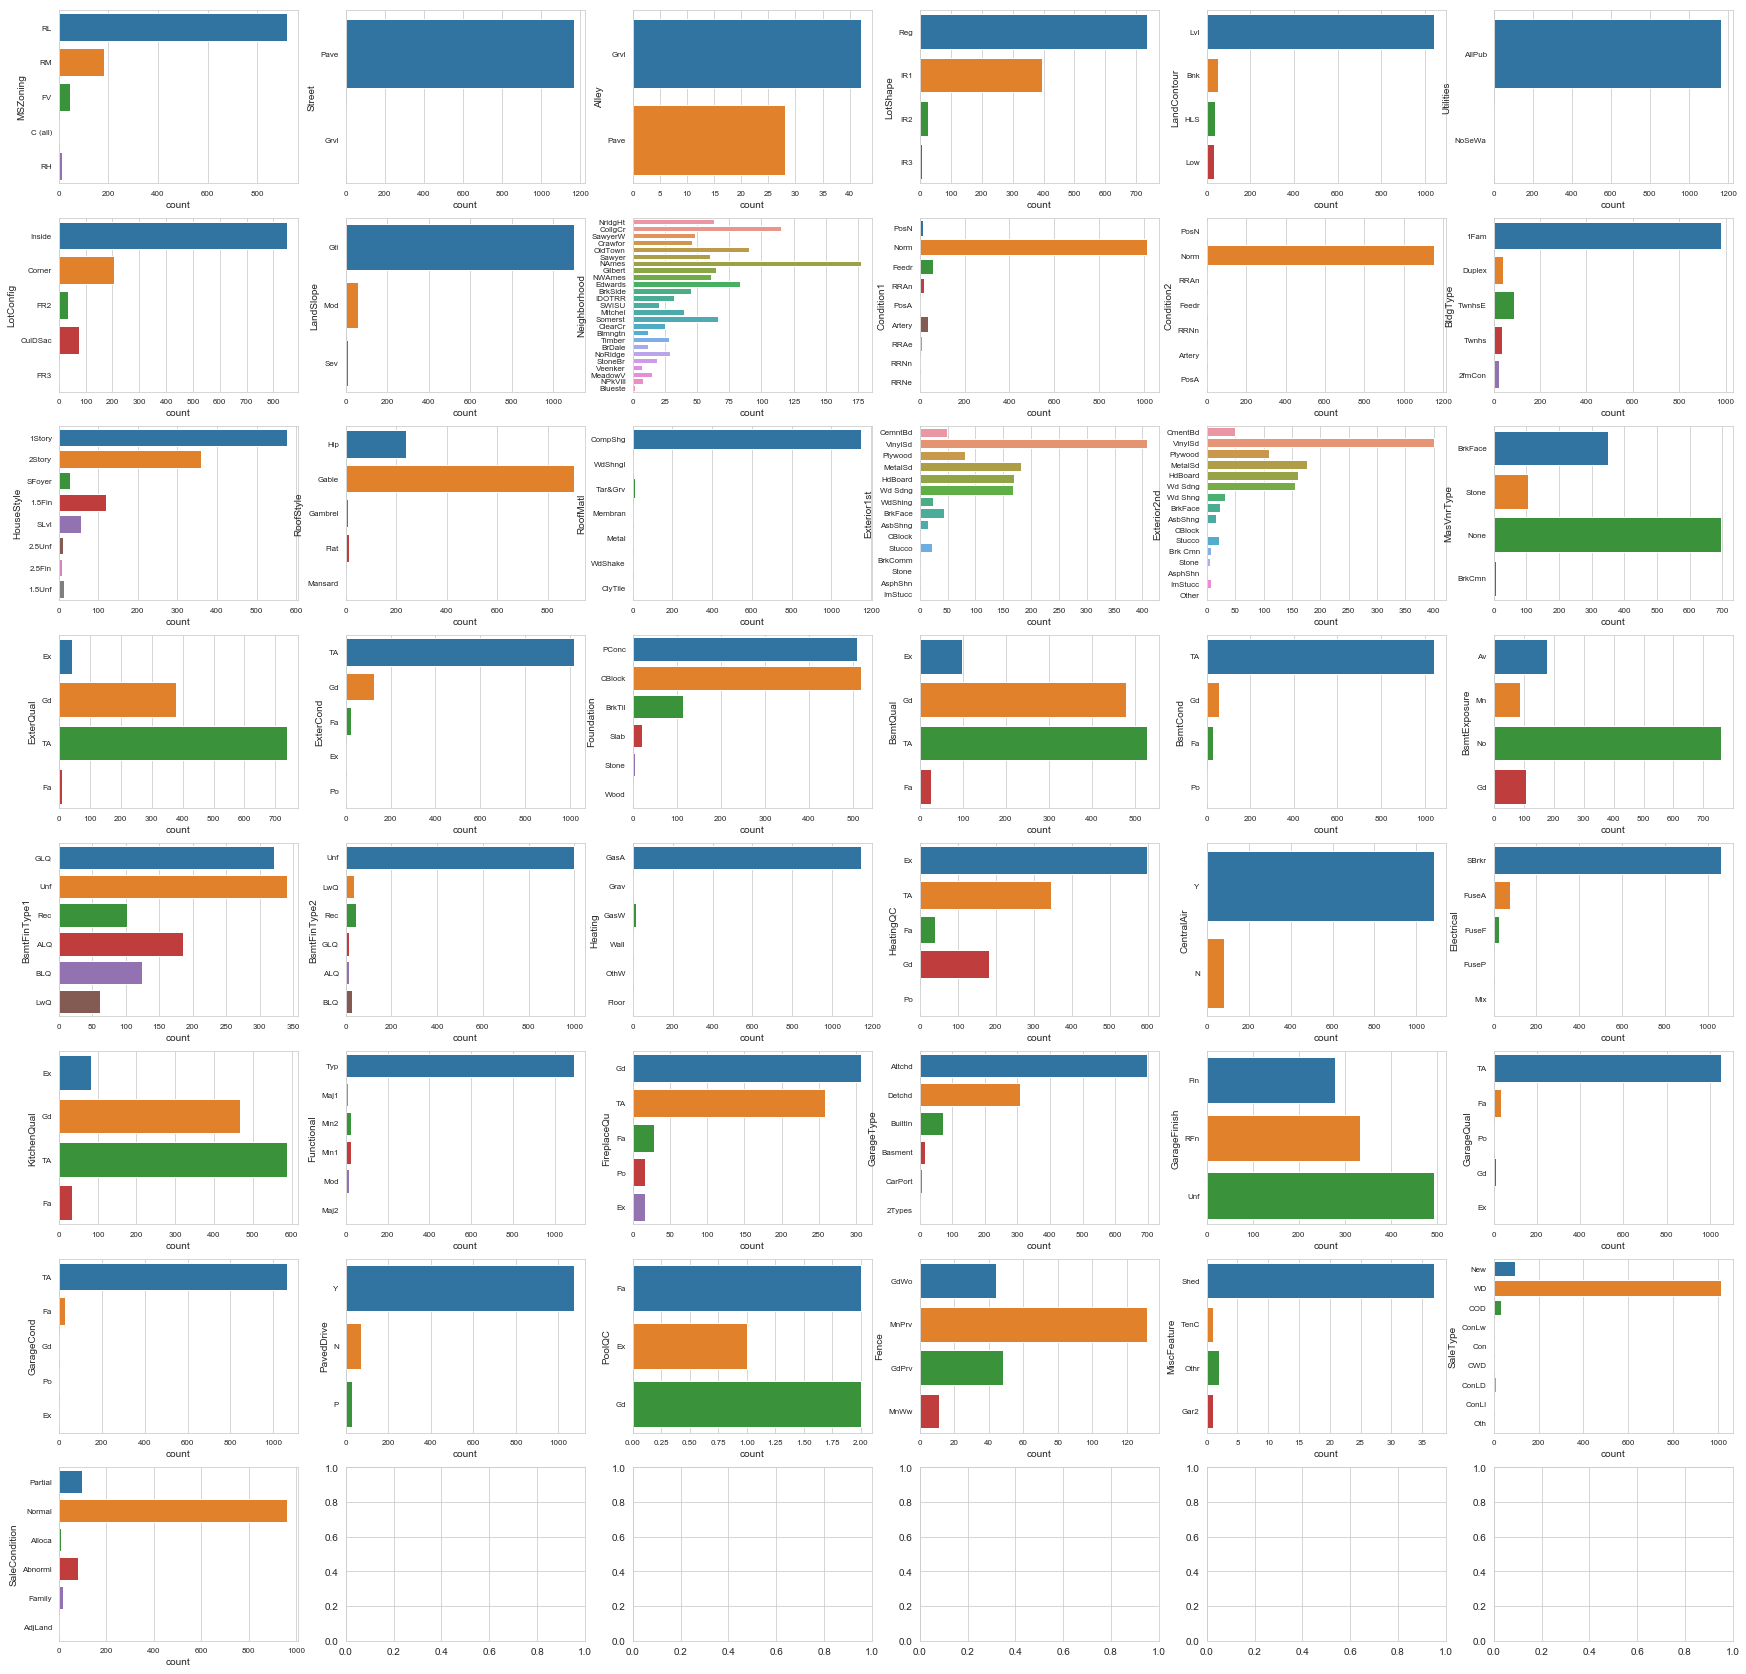

In [42]:
#call the function to plot the categorical features
features = cat_attrib.columns.values[0:]
plot_new_feature_distribution(cat_attrib,features)

In [43]:
#plotting the relationship of sale price and other variables
#sns.pairplot(train)

### Feature Engineering

In [44]:
#Lets add several variables to the data
#1. total number of bathrooms
strat_train_set['TotalBathrooms']=strat_train_set.FullBath + (strat_train_set.HalfBath*0.5) + strat_train_set.BsmtFullBath + (strat_train_set.BsmtHalfBath*0.5)
strat_train_set['TotalSqFT']=strat_train_set.GrLivArea + strat_train_set.TotalBsmtSF
strat_train_set['Age']=strat_train_set.YrSold - strat_train_set.YearBuilt
strat_train_set['Remodeled']=np.where((strat_train_set.YearBuilt)==(strat_train_set.YearRemodAdd),0,1)
strat_train_set.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBathrooms,TotalSqFT,Age,Remodeled
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,2078,GasA,Ex,Y,SBrkr,2084,0,0,2084,1,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,2007.0,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000,3.0,4162,1,1
948,949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500,2.5,2712,4,0
188,189,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,1086,GasA,TA,Y,SBrkr,1224,0,0,1224,2,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,1979.0,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337,3.0,2310,30,0
1059,1060,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.0,TA,TA,CBlock,TA,TA,Mn,Rec,297,LwQ,557,0,854,GasA,TA,Y,SBrkr,1096,895,0,1991,0,0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1977.0,Unf,2,432,TA,Fa,Y,0,0,19,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,220000,1.5,2845,75,1
667,668,20,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,1994,1998,Gable,CompShg,HdBoard,HdBoard,BrkFace,258.0,TA,TA,PConc,Gd,TA,No,GLQ,1138,Unf,0,270,1408,GasA,Ex,Y,SBrkr,1679,0,0,1679,1,0,2,0,3,1,Gd,7,Typ,1,Fa,Attchd,1994.0,RFn,2,575,TA,TA,Y,224,42,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,193500,3.0,3087,14,1


## View Correlations of features

In [45]:
#view highly correlated variables to identify which should be dropped
strat_train_set.corr().unstack().sort_values(ascending=False).drop_duplicates()

Remodeled       Remodeled         1.000000
GarageCars      GarageArea        0.877937
GrLivArea       TotalSqFT         0.872085
                TotRmsAbvGrd      0.833335
TotalBsmtSF     TotalSqFT         0.821506
YearBuilt       GarageYrBlt       0.817269
TotalBsmtSF     1stFlrSF          0.806374
OverallQual     SalePrice         0.800531
1stFlrSF        TotalSqFT         0.788193
TotalSqFT       SalePrice         0.773629
SalePrice       GrLivArea         0.700908
TotalBathrooms  FullBath          0.699815
TotRmsAbvGrd    BedroomAbvGr      0.689890
2ndFlrSF        GrLivArea         0.680938
TotalSqFT       TotRmsAbvGrd      0.675234
                OverallQual       0.662167
BsmtFullBath    BsmtFinSF1        0.651487
GarageCars      SalePrice         0.651388
GarageYrBlt     YearRemodAdd      0.645039
SalePrice       GarageArea        0.634647
                TotalBathrooms    0.633236
2ndFlrSF        TotRmsAbvGrd      0.627414
GrLivArea       FullBath          0.623562
2ndFlrSF   

In [46]:
#create a table of correlations between all features and median house value
corr_matrix=strat_train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

#the variables with the lowest correlations are

#BsmtFinSF2      -0.003980
#YrSold          -0.005636
#MiscVal         -0.024854
#LowQualFinSF    -0.030394
#Id              -0.030571
#BsmtHalfBath    -0.040339

SalePrice         1.000000
OverallQual       0.800531
TotalSqFT         0.773629
GrLivArea         0.700908
GarageCars        0.651388
GarageArea        0.634647
TotalBathrooms    0.633236
TotalBsmtSF       0.604969
1stFlrSF          0.596394
FullBath          0.563145
TotRmsAbvGrd      0.534714
YearBuilt         0.528381
YearRemodAdd      0.526142
GarageYrBlt       0.493869
Fireplaces        0.462406
MasVnrArea        0.461716
LotFrontage       0.353105
BsmtFinSF1        0.351111
OpenPorchSF       0.325071
WoodDeckSF        0.312707
2ndFlrSF          0.307961
HalfBath          0.290130
LotArea           0.275339
BsmtUnfSF         0.242704
BsmtFullBath      0.231159
BedroomAbvGr      0.175717
ScreenPorch       0.127168
MoSold            0.083639
3SsnPorch         0.056172
PoolArea          0.015600
BsmtFinSF2       -0.003980
YrSold           -0.005636
MiscVal          -0.024854
Remodeled        -0.028131
LowQualFinSF     -0.030394
Id               -0.030571
BsmtHalfBath     -0.040339
O

In [47]:
#making a list the variable that should be dropped
housing=strat_train_set.copy().drop(columns=['GarageArea','TotRmsAbvGrd','GarageYrBlt','TotalBsmtSF','BsmtFullBath','Id'])
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBathrooms,TotalSqFT,Age,Remodeled
825,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,GasA,Ex,Y,SBrkr,2084,0,0,2084,0,2,0,2,1,Ex,Typ,1,Gd,Attchd,Fin,3,TA,TA,Y,188,45,0,0,0,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000,3.0,4162,1,1
948,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500,2.5,2712,4,0
188,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,GasA,TA,Y,SBrkr,1224,0,0,1224,0,0,2,2,2,TA,Typ,2,TA,Detchd,Unf,2,TA,TA,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,153337,3.0,2310,30,0
1059,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.0,TA,TA,CBlock,TA,TA,Mn,Rec,297,LwQ,557,0,GasA,TA,Y,SBrkr,1096,895,0,1991,0,1,1,3,1,TA,Typ,1,Gd,Detchd,Unf,2,TA,Fa,Y,0,0,19,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,220000,1.5,2845,75,1
667,20,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,1994,1998,Gable,CompShg,HdBoard,HdBoard,BrkFace,258.0,TA,TA,PConc,Gd,TA,No,GLQ,1138,Unf,0,270,GasA,Ex,Y,SBrkr,1679,0,0,1679,0,2,0,3,1,Gd,Typ,1,Fa,Attchd,RFn,2,TA,TA,Y,224,42,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,193500,3.0,3087,14,1


In [48]:
# create function to find correlated features to the target variable with a user supplied upper and lower limit
# for correlation values between features and the target variable
def CorrelatedFeatureFinder(df,target,lower_limit,upper_limit):
    X_matrix=df.corr()
    cor_target=(abs(X_matrix[target].sort_values(ascending=False)))
    relevant_features = cor_target[cor_target.between(lower_limit,upper_limit,inclusive=False)].index
    correlated=df[relevant_features]
    return pd.DataFrame(correlated)


In [49]:
#viewing missing data in the stratified training set
null_values=housing.isnull().sum().sort_values(ascending=False)/len(housing)*100
null_values[null_values>0.000]


PoolQC          99.571918
MiscFeature     96.489726
Alley           94.006849
Fence           79.880137
FireplaceQu     46.318493
LotFrontage     17.636986
GarageCond       5.393836
GarageFinish     5.393836
GarageType       5.393836
GarageQual       5.393836
BsmtExposure     2.996575
BsmtFinType2     2.996575
BsmtQual         2.910959
BsmtCond         2.910959
BsmtFinType1     2.910959
MasVnrArea       0.684932
MasVnrType       0.684932
Electrical       0.085616
dtype: float64

## Data imputation

In [51]:
#separate categorical variables from numerical 
categorial_attrib=housing.select_dtypes(include=['object'])
numerical_attrib=housing.select_dtypes(exclude=['object'])

In [53]:
categorial_attrib.fillna("None",inplace=True)
categorial_attrib.head()

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
825,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,None,None,None,New,Partial
948,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,None,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
188,RL,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,None,None,None,WD,Alloca
1059,RL,Pave,None,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,Fa,Y,None,None,None,WD,Normal
667,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [56]:
dummy_cat=pd.get_dummies(categorial_attrib)
dummy_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeatur

In [55]:
numerical_attrib=numerical_attrib.apply(lambda x: x.fillna(x.mean()),axis=0)

In [57]:
dummy_housing=pd.concat([numerical_attrib, dummy_cat],axis=1)
dummy_housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBathrooms,TotalSqFT,Age,Remodeled,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFi

In [58]:
#create a table of correlations between all features and median house value
corr_matrix_dummy=dummy_housing.corr()
corr_matrix_dummy['SalePrice'].sort_values(ascending=False)

#The following features have low correlation to sale price and can be dropped
#PoolQC          99.571918
#MiscFeature     96.489726

SalePrice                1.000000
OverallQual              0.800531
TotalSqFT                0.773629
GrLivArea                0.700908
GarageCars               0.651388
TotalBathrooms           0.633236
1stFlrSF                 0.596394
FullBath                 0.563145
BsmtQual_Ex              0.553223
YearBuilt                0.528381
YearRemodAdd             0.526142
Foundation_PConc         0.497997
KitchenQual_Ex           0.496077
ExterQual_Gd             0.465693
Fireplaces               0.462406
MasVnrArea               0.458704
ExterQual_Ex             0.448014
BsmtFinType1_GLQ         0.441683
HeatingQC_Ex             0.430949
Neighborhood_NridgHt     0.418420
GarageFinish_Fin         0.396183
MasVnrType_Stone         0.377206
SaleType_New             0.368618
FireplaceQu_Gd           0.365970
SaleCondition_Partial    0.361564
BsmtFinSF1               0.351111
KitchenQual_Gd           0.339573
LotFrontage              0.335945
GarageType_Attchd        0.331472
OpenPorchSF   

In [59]:
#making a list the variable that should be dropped
housing=strat_train_set.copy().drop(columns=['PoolQC','MiscFeature','GarageYrBlt','TotalBsmtSF','BsmtFullBath','Id'])
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBathrooms,TotalSqFT,Age,Remodeled
825,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,BrkFace,816.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1636,Unf,0,442,GasA,Ex,Y,SBrkr,2084,0,0,2084,0,2,0,2,1,Ex,7,Typ,1,Gd,Attchd,Fin,3,1220,TA,TA,Y,188,45,0,0,0,0,NaN,0,6,2008,New,Partial,385000,3.0,4162,1,1
948,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,0,2,2006,WD,Normal,192500,2.5,2712,4,0
188,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,Stone,275.0,TA,TA,CBlock,Gd,TA,Av,GLQ,1086,Unf,0,0,GasA,TA,Y,SBrkr,1224,0,0,1224,0,0,2,2,2,TA,6,Typ,2,TA,Detchd,Unf,2,528,TA,TA,Y,120,0,0,0,0,0,NaN,0,6,2009,WD,Alloca,153337,3.0,2310,30,0
1059,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.0,TA,TA,CBlock,TA,TA,Mn,Rec,297,LwQ,557,0,GasA,TA,Y,SBrkr,1096,895,0,1991,0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,Unf,2,432,TA,Fa,Y,0,0,19,0,0,0,NaN,0,3,2007,WD,Normal,220000,1.5,2845,75,1
667,20,RL,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,6,5,1994,1998,Gable,CompShg,HdBoard,HdBoard,BrkFace,258.0,TA,TA,PConc,Gd,TA,No,GLQ,1138,Unf,0,270,GasA,Ex,Y,SBrkr,1679,0,0,1679,0,2,0,3,1,Gd,7,Typ,1,Fa,Attchd,RFn,2,575,TA,TA,Y,224,42,0,0,0,0,NaN,0,10,2008,WD,Normal,193500,3.0,3087,14,1


C:\Users\mailm_000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

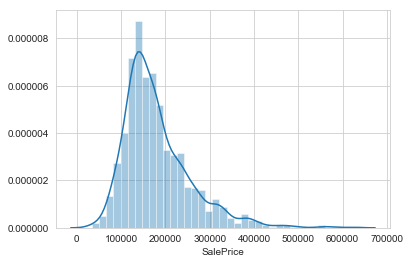

In [43]:
sns.distplot(strat_train_set.SalePrice)
plt.show

In [60]:
housing_labels=housing.SalePrice.copy()
log_housing_labels=np.log(housing_labels)
housing=housing.drop(columns=['SalePrice'])

In [71]:
#separate categorical variables from numerical 
cat_attrib=housing.select_dtypes(include=['object'])
num_attrib=housing.select_dtypes(exclude=['object'])

In [62]:


numeric_feats = housing.dtypes[housing.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = housing[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,26.543448
PoolArea,15.463431
LotArea,12.855110
3SsnPorch,9.557634
LowQualFinSF,8.251744
KitchenAbvGr,4.643574
BsmtFinSF2,4.226729
ScreenPorch,4.045240
BsmtHalfBath,3.890439
EnclosedPorch,2.999007


In [57]:
#create custom function to split the data between categorical and numerical

def DataTypeSplitter(df):
    cat_attributes=df.select_dtypes(include=['object'])
    num_attributes=df.select_dtypes(exclude=['object'])
    return list(cat_attributes),list(num_attributes)

In [82]:
#test the data type splitter function
cat,num=DataTypeSplitter(strat_train_set)

In [58]:
#view the percent missing of categorical data
cat_nulls=cat_attrib.isnull().sum().sort_values(ascending=False)/len(cat_attrib)*100
cat_nulls[cat_nulls>0.000]

PoolQC          99.571918
MiscFeature     96.489726
Alley           94.006849
Fence           79.880137
FireplaceQu     46.318493
GarageCond       5.393836
GarageQual       5.393836
GarageFinish     5.393836
GarageType       5.393836
BsmtFinType2     2.996575
BsmtExposure     2.996575
BsmtFinType1     2.910959
BsmtQual         2.910959
BsmtCond         2.910959
MasVnrType       0.684932
Electrical       0.085616
dtype: float64

In [63]:
#lets impute the missing data with the most frequent values
cat_imputer=SimpleImputer(strategy='constant',fill_value='None')
imputed_cats=cat_imputer.fit_transform(cat_attrib)
#cat_imputer.statistics_
pd.DataFrame(imputed_cats).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,None,New,Partial
1,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,None,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,WD,Normal
2,RL,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,None,WD,Alloca
3,RL,Pave,None,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,Fa,Y,None,WD,Normal
4,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,None,WD,Normal


In [60]:
#Most Machine Learning algorithms prefer to work with numbers anyway, 
#so let’s convert these categories from text to numbers.

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(imputed_cats)
housing_cat_1hot

<1168x264 sparse matrix of type '<class 'numpy.float64'>'
	with 50224 stored elements in Compressed Sparse Row format>

In [73]:
#Now use pipeline constructor with all the categorical variables
cat_pipeline=Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='none')),
                      ('cat_encoder',OneHotEncoder(handle_unknown='ignore'))])

housing_cat_trans=cat_pipeline.fit_transform(cat_attrib)
housing_cat_trans

<1168x255 sparse matrix of type '<class 'numpy.float64'>'
	with 47888 stored elements in Compressed Sparse Row format>

In [63]:
#view the percent missing of numerical data
num_nulls=num_attrib.isnull().sum().sort_values(ascending=False)/len(num_attrib)*100
num_nulls[num_nulls>0.000]

LotFrontage    17.636986
MasVnrArea      0.684932
dtype: float64

In [ ]:
#we should be able to impute the missing values for LotFrontage with the average value


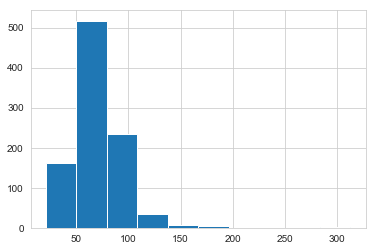

In [64]:
#we should be able to impute the missing values for LotFrontage with the average value
#lets inspect LotFrontage
num_attrib.LotFrontage.hist()

In [109]:
num_attrib.LotFrontage.mean()

70.4085239085239

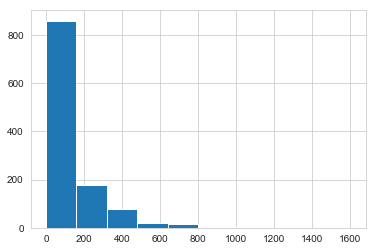

In [111]:
num_attrib.MasVnrArea.hist()

In [113]:
num_attrib.MasVnrArea.mean()

102.41982758620689

In [65]:
#lets impute the missing numerical values with the average

stand_num_pipeline=Pipeline([('num_imputer',SimpleImputer(strategy='mean')),
                       ('StandardScalar',StandardScaler())])

stand_housing_num_trans=stand_num_pipeline.fit_transform(num_attrib)
pd.DataFrame(stand_housing_num_trans).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,-0.872834,1.913948e+00,0.447199,2.824809,-0.537108,1.200435,1.134097,3.982075,2.638052,-0.291810,-0.262819,2.420776,-0.797636,-0.131359,1.117074,-0.24874,0.802160,-0.752727,-1.063321,-0.203898,0.296229,0.586269,1.671836,3.513020,0.774256,-0.017718,-0.368108,-0.125354,-0.276894,-0.065186,-0.085456,-0.113153,0.138712,1.023495,1.980385,-1.193329,1.056382
1,0.075841,-2.374693e-01,0.365229,0.653690,-0.537108,1.035166,0.843673,0.232035,-0.974705,-0.291810,0.847030,-0.582841,1.143557,-0.131359,0.516729,-0.24874,0.802160,1.263753,0.156678,-0.203898,0.296229,0.586269,0.329771,0.012943,0.419696,0.751003,-0.368108,-0.125354,-0.276894,-0.065186,-0.085456,-1.589825,-1.361429,0.381475,0.188315,-1.094250,-0.946628
2,0.787347,-2.813758e-01,-0.353472,-0.793722,-0.537108,0.274929,-0.269621,0.963069,1.423494,-0.291810,-1.255841,0.170679,-0.797636,-0.131359,-0.559214,-0.24874,-2.864858,3.280233,-1.063321,4.375966,-0.319421,2.142545,0.329771,0.266299,0.226299,-0.696002,-0.368108,-0.125354,-0.276894,-0.065186,-0.085456,-0.113153,0.888782,1.023495,-0.308520,-0.235567,-0.946628
3,-0.161328,6.239487e-16,0.084351,-0.070016,1.240065,-1.278598,-1.673338,2.107055,-0.318844,3.068861,-1.255841,-0.164219,1.270659,-0.131359,0.935801,-0.24874,-1.031349,1.263753,0.156678,-0.203898,0.296229,0.586269,0.329771,-0.184113,-0.740685,-0.696002,-0.068128,-0.125354,-0.276894,-0.065186,-0.085456,-1.220657,-0.611359,-0.902567,0.352692,1.250616,1.056382
4,-0.872834,-2.374693e-01,-0.239619,-0.070016,-0.537108,0.770736,0.650057,0.868202,1.538325,-0.291810,-0.649244,1.361137,-0.797636,-0.131359,0.327659,-0.24874,0.802160,-0.752727,0.156678,-0.203898,0.296229,0.586269,0.329771,0.486814,1.064351,-0.062937,-0.368108,-0.125354,-0.276894,-0.065186,-0.085456,1.363520,0.138712,1.023495,0.651782,-0.763988,1.056382


In [69]:
minmax_num_pipeline=Pipeline([('num_imputer',SimpleImputer(strategy='mean')),
                       ('MinMax',MinMaxScaler())])

minmax_housing_num_trans=minmax_num_pipeline.fit_transform(num_attrib)
pd.DataFrame(minmax_housing_num_trans).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.000000,0.318493,0.063114,1.000000,0.50,0.978261,0.966667,0.510000,0.289865,0.000000,0.189212,0.401560,0.000000,0.0,0.329691,0.0,0.666667,0.0,0.250,0.333333,0.416667,0.333333,0.75,0.860367,0.219370,0.082267,0.00000,0.0,0.0,0.0,0.0,0.454545,0.50,0.4,0.335260,0.007353,1.0
1,0.235294,0.150685,0.059389,0.666667,0.50,0.942029,0.866667,0.090000,0.000000,0.000000,0.400685,0.138137,0.462046,0.0,0.271665,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.50,0.334274,0.168028,0.175503,0.00000,0.0,0.0,0.0,0.0,0.090909,0.00,0.3,0.208268,0.029412,0.0
2,0.411765,0.147260,0.026726,0.444444,0.50,0.775362,0.483333,0.171875,0.192417,0.000000,0.000000,0.204222,0.000000,0.0,0.167671,0.0,0.000000,1.0,0.250,0.666667,0.333333,0.666667,0.50,0.372355,0.140023,0.000000,0.00000,0.0,0.0,0.0,0.0,0.454545,0.75,0.4,0.173060,0.220588,0.0
3,0.176471,0.169207,0.046624,0.555556,0.75,0.434783,0.000000,0.300000,0.052622,0.377883,0.000000,0.174851,0.492299,0.0,0.312170,0.0,0.333333,0.5,0.375,0.333333,0.416667,0.333333,0.50,0.304654,0.000000,0.000000,0.03442,0.0,0.0,0.0,0.0,0.181818,0.25,0.1,0.219916,0.551471,1.0
4,0.000000,0.150685,0.031901,0.555556,0.50,0.884058,0.800000,0.161250,0.201630,0.000000,0.115582,0.308628,0.000000,0.0,0.253391,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.333333,0.50,0.405501,0.261377,0.076782,0.00000,0.0,0.0,0.0,0.0,0.818182,0.50,0.4,0.241111,0.102941,1.0


In [67]:
num_attrib.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalBathrooms,TotalSqFT,Age,Remodeled
825,20,114.0,14803,10,5,2007,2008,816.0,1636,0,442,2084,0,0,2084,0,2,0,2,1,7,1,3,1220,188,45,0,0,0,0,0,6,2008,3.0,4162,1,1
948,60,65.0,14006,7,5,2002,2002,144.0,0,0,936,936,840,0,1776,0,2,1,3,1,7,1,2,474,144,96,0,0,0,0,0,2,2006,2.5,2712,4,0
188,90,64.0,7018,5,5,1979,1979,275.0,1086,0,0,1224,0,0,1224,0,0,2,2,2,6,2,2,528,120,0,0,0,0,0,0,6,2009,3.0,2310,30,0
1059,50,NaN,11275,6,7,1932,1950,480.0,297,557,0,1096,895,0,1991,0,1,1,3,1,7,1,2,432,0,0,19,0,0,0,0,3,2007,1.5,2845,75,1
667,20,65.0,8125,6,5,1994,1998,258.0,1138,0,270,1679,0,0,1679,0,2,0,3,1,7,1,2,575,224,42,0,0,0,0,0,10,2008,3.0,3087,14,1


In [72]:
housing_num=list(num_attrib)
housing_cat=list(cat_attrib)


In [94]:
#full pipleline with the column transformer

full_pipeline= ColumnTransformer([('num',stand_num_pipeline,housing_num),('cat',cat_pipeline,housing_cat)])
housing_prepared=full_pipeline.fit_transform(housing)


In [81]:
minmax_full_pipeline= ColumnTransformer([('num',minmax_num_pipeline,housing_num),('cat',cat_pipeline,housing_cat)])
minmax_housing_prepared=minmax_full_pipeline.fit_transform(housing)

## Linear regression to predict overall score

In [39]:
#assumptions of linear regression
# all variables are continuous and not categorical
# data is free of missing values
# there is a linear relationship between predictors and predictants
# all predictors of independent of each other
# residuals/predictor errors are normally distributed

In [99]:
#look at room mean squred error
lin_reg=LinearRegression(normalize=False)
lin_reg.fit(housing_prepared,log_housing_labels)
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse= mean_squared_error(log_housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.08768784863427156

In [100]:
#look at room mean squred error
minmax_lin_reg=LinearRegression(normalize=True)
minmax_lin_reg.fit(minmax_housing_prepared,log_housing_labels)
minmax_housing_predictions=minmax_lin_reg.predict(minmax_housing_prepared)
minmax_lin_mse= mean_squared_error(log_housing_labels,minmax_housing_predictions)
minmax_lin_rmse=np.sqrt(minmax_lin_mse)
minmax_lin_rmse

0.08768784863455359

### Ridge Regression - Regularize Linear regression

In [101]:
ridge_reg = Ridge(alpha =5,solver = "sag")
ridge_reg.fit(housing_prepared,log_housing_labels)
ridge_predictions=ridge_reg.predict(housing_prepared)
ridge_mse=mean_squared_error(log_housing_labels,ridge_predictions)
ridge_rmse=np.sqrt(ridge_mse)
ridge_rmse

0.10323090653008676

In [102]:
minmax_ridge_reg = Ridge(alpha =5,solver = "sag")
minmax_ridge_reg.fit(minmax_housing_prepared,log_housing_labels)
minmax_ridge_predictions=minmax_ridge_reg.predict(minmax_housing_prepared)
minmax_ridge_mse=mean_squared_error(log_housing_labels,minmax_ridge_predictions)
minmax_ridge_rmse=np.sqrt(minmax_ridge_mse)
minmax_ridge_rmse

0.10796932790956289

### Stochastic Gradient Decent - Linear Regression

In [132]:
#SGD must have non negative data
sgd_reg = SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=42, shuffle=True, tol=0.0003,
       validation_fraction=0.1, verbose=0, warm_start=False)
minmax_sgd_reg= sgd_reg.fit(minmax_housing_prepared,log_housing_labels.ravel())

minmax_sgd_housing_predictions=minmax_sgd_reg.predict(minmax_housing_prepared)
minmax_sgd_mse= mean_squared_error(log_housing_labels,minmax_sgd_housing_predictions)
minmax_sgd_rmse=np.sqrt(minmax_sgd_mse)
minmax_sgd_rmse

0.12863923730399332

### Decision Tree Regressor

In [92]:
tree_reg= DecisionTreeRegressor()
tree_reg.fit(housing_prepared,log_housing_labels)
tree_reg_predictions=tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(log_housing_labels,tree_reg_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

## badly overfits the data

2.95979749071606e-05

In [107]:
minmax_tree_reg= DecisionTreeRegressor()
minmax_tree_reg=minmax_tree_reg.fit(minmax_housing_prepared,log_housing_labels)
minmax_tree_reg_predictions=minmax_tree_reg.predict(minmax_housing_prepared)
minmax_tree_mse= mean_squared_error(log_housing_labels,minmax_tree_reg_predictions)
minmax_tree_rmse=np.sqrt(minmax_tree_mse)
minmax_tree_rmse

2.95979749071606e-05

### Lasso Regression

In [165]:
lasso_reg = Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=20000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False) 
lasso_reg.fit(housing_prepared,log_housing_labels) 
lasso_predictions=lasso_reg.predict(housing_prepared)
lasso_mse= mean_squared_error(log_housing_labels,lasso_predictions)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse

0.0905604214958256

### Polynomial Regression

In [75]:
polynomial_regression = Pipeline([("poly_features" , PolynomialFeatures(degree = 2 , include_bias = False)), 
                                   ("lin_reg" , LinearRegression (normalize=True))])
polynomial_regression.fit(housing_prepared,log_housing_labels)
polynomial_predictions=polynomial_regression.predict(housing_prepared)
polynomial_mse= mean_squared_error(log_housing_labels,polynomial_predictions)
polynomial_rmse=np.sqrt(polynomial_mse)
polynomial_rmse

1.142121086955962e-06

In [533]:
polynomial_predictions=polynomial_regression.predict(housing_prepared)
polynomial_mse= mean_squared_error(log_housing_labels,polynomial_predictions)
polynomial_rmse=np.sqrt(polynomial_mse)
polynomial_rmse

1.3694223672427373e-06

### Kernel Ridge regression

In [122]:
kernel_ridge = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
kernel_ridge.fit(housing_prepared,log_housing_labels)
kernel_ridge_predictions=kernel_ridge.predict(housing_prepared)
kernel_ridge_mse= mean_squared_error(log_housing_labels,kernel_ridge_predictions)
kernel_ridge_rmse=np.sqrt(kernel_ridge_mse)
kernel_ridge_rmse

0.09256737914138888

## ElasticNet

In [142]:
elasticNet = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elasticNet.fit(housing_prepared,log_housing_labels)
elasticNet_predictions=elasticNet.predict(housing_prepared)
elasticNet_mse= mean_squared_error(log_housing_labels,elasticNet_predictions)
elasticNet_rmse=np.sqrt(elasticNet_mse)
elasticNet_rmse

0.1747503763742438

In [ ]:
minmax_elasticNet = ElasticNet(alpha=0.0001, l1_ratio = 0.5,max_iter=10000)
minmax_elasticNet=elasticNet.fit(minmax_housing_prepared,log_housing_labels)
minmax_elasticNet_predictions=minmax_elasticNet.predict(minmax_housing_prepared)
minmax_elasticNet_mse= mean_squared_error(log_housing_labels,minmax_elasticNet_predictions)
minmax_elasticNet_rmse=np.sqrt(minmax_elasticNet_mse)
minmax_elasticNet_rmse

### Cross Validation of models

In [79]:
def display_scores(scores):
    print("Scores",scores)
    print("Mean",scores.mean())
    print("Standard Deviation",scores.std())


In [123]:
#kernel ridge cross validation
kernel_ridge_scores=cross_val_score(kernel_ridge,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)

kernel_ridge_rmse_scores=np.sqrt(-kernel_ridge_scores)

display_scores(kernel_ridge_rmse_scores)

Scores [0.10766613 0.12187222 0.12880071 0.14285472 0.09537697 0.10471579
 0.09373547 0.09864467 0.24330687 0.11621727]
Mean 0.12531908262542024
Standard Deviation 0.0420442188396553


## Lasso cross validation

In [120]:
#lasso cross validation
lasso_scores=cross_val_score(lasso_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)

lasso_rmse_scores=np.sqrt(-lasso_scores)

display_scores(lasso_rmse_scores)

Scores [0.12248899 0.1262588  0.1215674  0.13690981 0.10589551 0.12465072
 0.10431373 0.10810559 0.29057176 0.12496587]
Mean 0.136572817919774
Standard Deviation 0.05226343688871557


## decision tree cross validation

In [95]:
# let use cross validation to get better scores
scores=cross_val_score(tree_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores [0.18541229 0.20190064 0.22233327 0.19828642 0.19013119 0.22220734
 0.21220442 0.17389794 0.23416806 0.19128166]
Mean 0.2031823237761091
Standard Deviation 0.01811392752653927


In [96]:
# let use cross validation to get better scores
minmax_tree_scores=cross_val_score(tree_reg,minmax_housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
minmax_tree_rmse_scores = np.sqrt(-minmax_tree_scores)
display_scores(minmax_tree_rmse_scores)

Scores [0.19252947 0.20858537 0.21340605 0.19636425 0.18758374 0.21472631
 0.19543291 0.17686562 0.23766124 0.19418261]
Mean 0.20173375686109055
Standard Deviation 0.016345322419369326


## use cross validation with linear regression

In [124]:
#use cross validation with linear regression

lin_scores=cross_val_score(lin_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)

lin_rmse_scores=np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores [0.13095534 0.14965327 0.11697642 0.14984041 0.11088738 0.13784682
 0.11954414 0.12083723 0.31390441 0.13151085]
Mean 0.1481956276536832
Standard Deviation 0.05664174358699217


In [91]:
#use cross validation with linear regression

minmax_lin_scores=cross_val_score(minmax_lin_reg,minmax_housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)

minmax_lin_rmse_scores=np.sqrt(-minmax_lin_scores)

display_scores(minmax_lin_rmse_scores)

Scores [0.13225094 0.13446283 0.11707549 0.13994406 0.11088552 0.13803648
 0.1194785  0.15701192 0.30667078 0.13056545]
Mean 0.14863819646843465
Standard Deviation 0.05412971933276252


## random forest cross validation

In [98]:
# random forest cross validation
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,log_housing_labels)

forest_scores=cross_val_score(forest_reg,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores [0.13465722 0.14997431 0.16274728 0.14060265 0.13938997 0.15657867
 0.13762842 0.13806902 0.18619645 0.13854579]
Mean 0.14843897907380801
Standard Deviation 0.015344298959665843


In [97]:
# random forest cross validation
forest_reg=RandomForestRegressor()
minmax_forest_reg=forest_reg.fit(minmax_housing_prepared,log_housing_labels)

minmax_forest_scores=cross_val_score(minmax_forest_reg,minmax_housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
minmax_forest_rmse_scores=np.sqrt(-minmax_forest_scores)
display_scores(minmax_forest_rmse_scores)

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores [0.14610401 0.15499716 0.17019595 0.1430751  0.146139   0.16007718
 0.13452274 0.12989202 0.18957091 0.13960996]
Mean 0.1514184021523234
Standard Deviation 0.017058738662617624


## SGD cross validation

In [136]:
#SGD cross validation

sgd_reg_scores=cross_val_score(minmax_sgd_reg,minmax_housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
sgd_reg_rmse_scores=np.sqrt(-sgd_reg_scores)
display_scores(sgd_reg_rmse_scores)

Scores [0.21683781 0.17491513 0.15485209 0.22589343 0.1386862  0.17122804
 0.17110216 0.21736519 0.23577853 0.18706896]
Mean 0.18937275574511428
Standard Deviation 0.031085913039235788


## ElasticNet Cross Validation

In [145]:
#ElasticNet cross validation

elasticNet_scores=cross_val_score(elasticNet,housing_prepared,log_housing_labels,scoring="neg_mean_squared_error",cv=10)
elasticNet_rmse_scores=np.sqrt(-elasticNet_scores)
display_scores(elasticNet_rmse_scores)

Scores [0.12414694 0.12764334 0.12191718 0.14604653 0.10755448 0.12967966
 0.10998295 0.11068165 0.29382497 0.12792868]
Mean 0.13994063868444856
Standard Deviation 0.05243583649333957


## Fine Tune with Grid Search

In [416]:
# Scikit-Learn’s GridSearchCV searchs through all hyper parameters to find the best combination
param_grid = [{ 'n_estimators':[3,10,30],'max_features':[ 2,4,6,8]},
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}]

grid_search = GridSearchCV(forest_reg,param_grid,cv = 5,scoring='neg_mean_squared_error',return_train_score = True)
grid_search.fit(housing_prepared,log_housing_labels)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [417]:
cvres = grid_search.cv_results_ 
for mean_score , params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.22908536752673714 {'max_features': 2, 'n_estimators': 3}
0.1961690583558806 {'max_features': 2, 'n_estimators': 10}
0.17857417800219605 {'max_features': 2, 'n_estimators': 30}
0.21462451195790888 {'max_features': 4, 'n_estimators': 3}
0.18046315245243824 {'max_features': 4, 'n_estimators': 10}
0.1713388402286254 {'max_features': 4, 'n_estimators': 30}
0.20757813316250695 {'max_features': 6, 'n_estimators': 3}
0.17106432776931138 {'max_features': 6, 'n_estimators': 10}
0.165008658976122 {'max_features': 6, 'n_estimators': 30}
0.20305443537441448 {'max_features': 8, 'n_estimators': 3}
0.17132009697553993 {'max_features': 8, 'n_estimators': 10}
0.15982281394095207 {'max_features': 8, 'n_estimators': 30}
0.21695261192307175 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.18260963522658172 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.20628803883747035 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.1823898696835341 {'bootstrap': False, 'max_featu

In [118]:
# Ridge Regression - Scikit-Learn’s GridSearchCV searchs through all hyper parameters to find the best combination
param_grid = [{ 'alpha':[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}]

ridge_grid_search = GridSearchCV(ridge_reg,param_grid,cv = 10,scoring='neg_mean_squared_error',return_train_score = True)
ridge_grid_search.fit(housing_prepared,log_housing_labels)
ridge_grid_search.best_estimator_

Ridge(alpha=75, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [526]:
# SGD Regressor grid search
SGD_param_grid = [{ 'max_iter':[1000,3000,5000],'tol':[0.003,0.005,0.0003]}]
SGD_grid_search = GridSearchCV(sgd_reg,SGD_param_grid,cv = 10,scoring='neg_mean_squared_error',return_train_score = True)
SGD_grid_search.fit(housing_prepared,log_housing_labels)
SGD_grid_search.best_estimator_



SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.0003,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [116]:
lasso_param_grid = [{'alpha':[0.1,0.01,0.001,0.0001,0.00001,0.000001], 'max_iter':[1000,5000,15000,20000,25000,30000,35000]}]
lasso_reg = Lasso() 

lasso_grid_search = GridSearchCV(lasso_reg,lasso_param_grid,cv = 10,scoring='neg_mean_squared_error',return_train_score = True)

lasso_grid_search.fit(housing_prepared,log_housing_labels)
lasso_grid_search.best_estimator_

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Analyze the Best Models and Their Errors

In [418]:
#RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

feature_importance=grid_search.best_estimator_.feature_importances_

feature_importance

array([8.54773484e-03, 1.34207347e-02, 2.67233653e-02, 5.73347599e-02,
       1.04568090e-02, 4.33270142e-02, 3.43283293e-02, 1.06258208e-02,
       2.28017164e-02, 1.47620924e-03, 8.82786582e-03, 3.78425402e-02,
       3.04064161e-02, 1.75278967e-02, 2.48675386e-04, 4.31989854e-02,
       2.93260743e-03, 1.29736992e-03, 2.13509814e-02, 5.39817823e-03,
       7.84202723e-03, 4.64588350e-04, 1.81045959e-02, 2.26422713e-02,
       4.02392045e-02, 2.79792158e-02, 4.32573325e-02, 5.90026555e-03,
       1.24071561e-02, 2.65176257e-03, 2.30599253e-04, 1.03503797e-03,
       5.97850374e-05, 1.18108575e-03, 7.49369733e-03, 3.60267171e-03,
       1.08086043e-03, 2.46947094e-03, 3.58864337e-04, 6.81280525e-03,
       1.32071320e-02, 3.90315795e-05, 2.17562410e-04, 3.27047394e-03,
       7.99580554e-04, 2.06802627e-04, 2.14219206e-03, 1.36277166e-03,
       9.67165483e-04, 9.66923723e-04, 1.44137202e-03, 0.00000000e+00,
       0.00000000e+00, 1.15516865e-03, 8.15007035e-04, 1.91949066e-04,
      

In [299]:
ate

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [240]:
#need this code to impute the missing data, create a dataframe with the imputed data, and lable the columns correctly
cat_imputer=SimpleImputer(strategy='most_frequent')
imputed_cats=cat_imputer.fit_transform(cat_attrib)
#cat_imputer.statistics_
bet=pd.DataFrame(imputed_cats)

bet=bet.rename(columns=dict(zip(bet.columns,ate)))


In [241]:
bet.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,New,Partial
1,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Alloca
3,RL,Pave,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,Fa,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [302]:
#get list of the new features after they have been coverted to dummies
dummy_cats=list(pd.get_dummies(bet))

In [304]:
#join the numerial features to the dummy categorical featurs
new_attributes=housing_num + dummy_cats

In [308]:
# display these importance scores next to their corresponding attribute names:

important_feats=pd.DataFrame(sorted(zip(feature_importance , new_attributes), reverse = True),columns=['importance','feature'])
important_feats

,importance,feature
0,6.869150e-02,TotalBsmtSF
1,6.275898e-02,GrLivArea
2,4.210372e-02,BsmtQual_TA
3,3.977273e-02,GarageCars
4,3.645823e-02,FullBath
5,3.597806e-02,OverallQual
6,3.013731e-02,GarageYrBlt
7,2.982301e-02,GarageArea
8,2.204101e-02,KitchenQual_Ex
9,2.122355e-02,TotRmsAbvGrd


## Run the model on the validation set

In [310]:
strat_validation_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1048,1049,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1771,0,0,1771,0,0,1,0,3,1,TA,9,Min1,1,TA,Attchd,1960.0,Unf,2,336,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal,115000
600,601,60,RL,74.0,10927,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,280.0,Gd,TA,PConc,Gd,TA,Av,GLQ,546,Unf,0,512,1058,GasA,Ex,Y,SBrkr,1058,846,0,1904,1,0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2,736,TA,TA,Y,179,60,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,275000
845,846,85,RL,NaN,16647,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,SFoyer,5,5,1975,1981,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1390,Unf,0,0,1390,GasA,TA,Y,SBrkr,1701,0,0,1701,1,0,2,0,3,1,TA,6,Min2,2,TA,Basment,1975.0,Fin,2,611,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,171000
172,173,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,7,1987,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,495,Rec,215,354,1064,GasA,Gd,Y,SBrkr,1064,703,0,1767,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,RFn,2,504,Gd,TA,Y,441,35,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239000
1183,1184,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1920,1950,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,821,Unf,0,299,1120,GasA,Ex,Y,SBrkr,1130,0,0,1130,1,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1970.0,Unf,2,720,TA,TA,Y,229,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,120000


In [149]:
# configure the  validation sample for running the model (split features from target variable)
x_validation= strat_validation_set.drop(columns=['PoolQC','MiscFeature','GarageYrBlt','TotalBsmtSF','BsmtFullBath','Id','SalePrice'])
y_validation= strat_validation_set.SalePrice.copy()
log_y_validation=np.log(y_validation)

In [150]:
x_validation.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1048,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,GasA,TA,Y,SBrkr,1771,0,0,1771,0,1,0,3,1,TA,9,Min1,1,TA,Attchd,Unf,2,336,TA,TA,Y,0,0,0,0,0,0,GdPrv,0,11,2009,WD,Normal
600,60,RL,74.0,10927,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,280.0,Gd,TA,PConc,Gd,TA,Av,GLQ,546,Unf,0,512,GasA,Ex,Y,SBrkr,1058,846,0,1904,0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,Fin,2,736,TA,TA,Y,179,60,0,0,0,0,NaN,0,6,2006,WD,Normal
845,85,RL,NaN,16647,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,SFoyer,5,5,1975,1981,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1390,Unf,0,0,GasA,TA,Y,SBrkr,1701,0,0,1701,0,2,0,3,1,TA,6,Min2,2,TA,Basment,Fin,2,611,TA,TA,Y,0,0,0,0,0,0,NaN,0,1,2007,WD,Normal
172,160,RL,44.0,5306,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,2Story,7,7,1987,1987,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,Gd,PConc,Gd,Gd,No,GLQ,495,Rec,215,354,GasA,Gd,Y,SBrkr,1064,703,0,1767,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,RFn,2,504,Gd,TA,Y,441,35,0,0,0,0,NaN,0,6,2006,WD,Normal
1183,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1920,1950,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,821,Unf,0,299,GasA,Ex,Y,SBrkr,1130,0,0,1130,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,Unf,2,720,TA,TA,Y,229,0,0,0,0,0,NaN,0,6,2006,WD,Normal


In [151]:
X_test_prepared=full_pipeline.transform(x_validation)

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [152]:
#run predictions with random forest regressor with grid search and cross validation
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_prepared)


NameError: name 'grid_search' is not defined

In [425]:
final_mse = mean_squared_error(log_y_validation,final_predictions) 
final_rmse = np.sqrt(final_mse)
final_rmse

0.17697697177089122

In [154]:
final_lin_scores=cross_val_score(lin_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=10)
final_lin_rmse_scores=np.sqrt(-final_lin_scores)
display_scores(final_lin_rmse_scores)

Scores [0.24508588 0.36268027 0.30311658 0.68707151 0.23777012 0.3422357
 0.2629844  0.23079455 0.29069053 0.44000327]
Mean 0.3402432822340759
Standard Deviation 0.13118184617013726


### Ridge Regression

In [155]:
#ridge regression with cross validation
ridge_scores=cross_val_score(ridge_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=10)

final_ridge_rmse_scores=np.sqrt(-ridge_scores)

display_scores(final_ridge_rmse_scores)

Scores [0.12535676 0.2188445  0.17730078 0.37014456 0.14122322 0.14877944
 0.13744603 0.13235634 0.1791562  0.20126884]
Mean 0.18318766709532788
Standard Deviation 0.06896927059178821


### Stochastic Gradient Decent

In [157]:
#sgd regression with cross validation
final_sgd_scores=cross_val_score(sgd_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_sgd_rmse_scores=np.sqrt(-final_sgd_scores)

display_scores(final_sgd_rmse_scores)

Scores [1.57712519e+11 1.62753859e+10 1.84418801e+10 3.09230025e+11
 1.66125997e+11 1.13056715e+11 3.43956501e+11 4.91946628e+10
 4.51350208e+10 1.71936250e+09 4.47558597e+10 1.53857222e+06
 8.07214000e+09 2.42298445e+07 4.13055882e+10]
Mean 87667161731.03056
Standard Deviation 107312270722.20728


### Lasso Regression

In [166]:
#Run lasso regression
final_lasso_predictions=lasso_reg.predict(X_test_prepared)
final_lasso_mse=mean_squared_error(log_y_validation,final_lasso_predictions)
final_lasso_rmse=np.sqrt(final_lasso_mse)
final_lasso_rmse

0.1778226370063231

In [170]:
#lasso regression with cross validation
final_lasso_reg=Lasso(alpha=0.0001, max_iter=10000)
final_lasso_scores=cross_val_score(final_lasso_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=10)

final_lasso_rmse_scores=np.sqrt(-final_lasso_scores)

display_scores(final_lasso_rmse_scores)

Scores [0.15553273 0.25216646 0.20783964 0.42103107 0.17710983 0.21785474
 0.15844867 0.13376368 0.23394852 0.21656416]
Mean 0.21742595084594854
Standard Deviation 0.07678647245116613


In [172]:
#Lasso Regression with built in CV function
final_model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0001],max_iter=10000,cv=10).fit(X_test_prepared,log_y_validation)
final_model_lasso_scores=cross_val_score(final_model_lasso,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)
final_model_lasso_rmse_scores=np.sqrt(-final_model_lasso_scores)

display_scores(final_model_lasso_rmse_scores)

Scores [0.11777478 0.11695546 0.24280406 0.12061627 0.10453556 0.4366844
 0.11180661 0.13853958 0.12949089 0.10185096 0.11936882 0.14272489
 0.13261105 0.17702931 0.18940691]
Mean 0.1588133040508086
Standard Deviation 0.08270523492880869


In [502]:
coef = pd.Series(final_model_lasso.coef_, index = X_test_prepared.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


AttributeError: columns not found

### Random Forest

In [162]:
#random forest regression with cross validation
final_forest_scores=cross_val_score(forest_reg,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_forest_rmse_scores=np.sqrt(-final_forest_scores)

display_scores(final_forest_rmse_scores)

Scores [0.15444772 0.13376945 0.31358272 0.19683199 0.11913413 0.29085923
 0.1629493  0.22730049 0.16134098 0.14401776 0.14880989 0.15531646
 0.19254175 0.2361318  0.27219472]
Mean 0.19394855900667496
Standard Deviation 0.058625828933204


In [503]:
X_test_prepared

<292x266 sparse matrix of type '<class 'numpy.float64'>'
	with 17921 stored elements in Compressed Sparse Row format>

### Kernel Ridge Regression

In [163]:
#kernel regression with cross validation
final_kernel_ridge_scores=cross_val_score(kernel_ridge,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_kernel_ridge_rmse_scores=np.sqrt(-final_kernel_ridge_scores)

display_scores(final_kernel_ridge_rmse_scores)

Scores [0.13235356 0.10564363 0.22354841 0.14317096 0.10936341 0.38095308
 0.09570949 0.17402683 0.14564013 0.09203758 0.11620528 0.12676221
 0.13599929 0.14447312 0.22501259]
Mean 0.15672663789680688
Standard Deviation 0.07140763991839165


In [178]:
import xgboost as xgb
final_xgb=xgb.XGBRegressor()


final_xgb_scores=cross_val_score(final_xgb,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_xgb_rmse_scores=np.sqrt(-final_xgb_scores)

display_scores(final_xgb_rmse_scores)

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.

Scores [0.13237945 0.12440023 0.23970587 0.14314217 0.09564817 0.29561731
 0.1392818  0.26059283 0.12603306 0.148457   0.11520466 0.15597678
 0.1406641  0.22324836 0.2861697 ]
Mean 0.175101431340778
Standard Deviation 0.0642551434584242


C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [180]:
from sklearn.ensemble import GradientBoostingRegressor
final_gradient= GradientBoostingRegressor()

final_gradient_scores=cross_val_score(final_gradient,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_gradient_rmse_scores=np.sqrt(-final_gradient_scores)

display_scores(final_gradient_rmse_scores)

Scores [0.11863572 0.11963251 0.28265664 0.14620011 0.09769744 0.30596205
 0.11777429 0.21632034 0.15183839 0.12457473 0.1475247  0.15198839
 0.132739   0.17525248 0.28685236]
Mean 0.17170994344488938
Standard Deviation 0.06596413493020788


In [174]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [181]:
averaged_models = AveragingModels(models = (kernel_ridge, final_model_lasso,final_xgb,final_gradient))
final_averaged_models_scores=cross_val_score(averaged_models,X_test_prepared,log_y_validation,scoring="neg_mean_squared_error",cv=15)

final_averaged_models_rmse_scores=np.sqrt(-final_averaged_models_scores)

display_scores(final_averaged_models_rmse_scores)

C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\chunter\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.

Scores [0.1125458  0.10041596 0.23999621 0.12787729 0.09039448 0.34863228
 0.09945586 0.17919094 0.12353723 0.1057238  0.11540726 0.12845792
 0.1242291  0.14117562 0.2364541 ]
Mean 0.15156625595097611
Standard Deviation 0.06897605777551336


In [187]:
np.log(10000)

9.210340371976184

In [189]:
np.exp(9.210340371976184)

10000.00000000001

In [190]:
np.exp(0.15156625595097611)

1.1636553983506213

In [191]:
log_y_validation.head()

1048    11.652687
600     12.524526
845     12.049419
172     12.384219
1183    11.695247
Name: SalePrice, dtype: float64

In [195]:
np.exp(.11)

1.1162780704588713